<a href="https://colab.research.google.com/github/genaiconference/AgenticAI_GenAIHack/blob/main/01_react_agent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!pip install -q langchain==0.2.9 langchain-openai==0.1.7 tavily-python==0.3.5 python_dotenv==1.0.1 langchain_community==0.2.10


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 3.2 MB/s eta 0:00:00


In [2]:
import warnings
warnings.filterwarnings("ignore")

#### Load environment variables

In [24]:
import os
from dotenv import load_dotenv
load_dotenv(dotenv_path=".env")
GPT4_TURBO_DEPLOYMENT_NAME = os.getenv('GPT4_TURBO_DEPLOYMENT_NAME')

#### Define LLM which acts as a the BRAIN of the Agent

In [27]:
from langchain_openai import ChatOpenAI

llm  = ChatOpenAI(model="gpt-4-turbo")

In [28]:
llm.invoke("how many 'r's in strawberry")

AIMessage(content='The word "strawberry" contains two \'r\' letters.', response_metadata={'token_usage': {'completion_tokens': 14, 'prompt_tokens': 14, 'total_tokens': 28}, 'model_name': 'gpt-4-turbo', 'system_fingerprint': 'fp_0993c4a4c0', 'finish_reason': 'stop', 'logprobs': None}, id='run-631488e6-5885-41bd-bde0-a97771ab135f-0')

#### Agent Creation

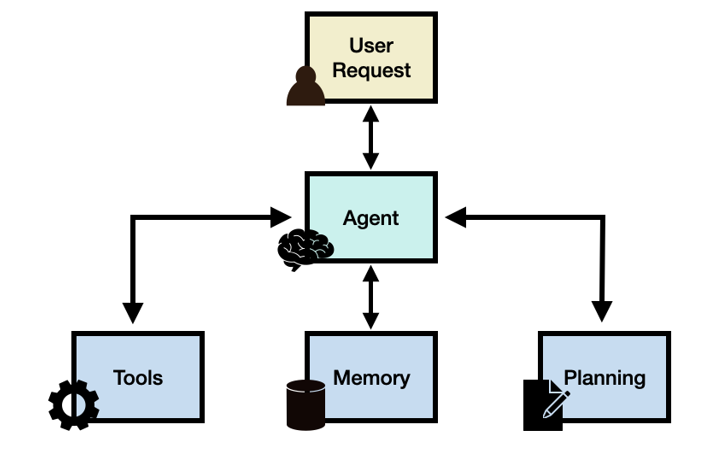

A more closer picture of how an agent works...

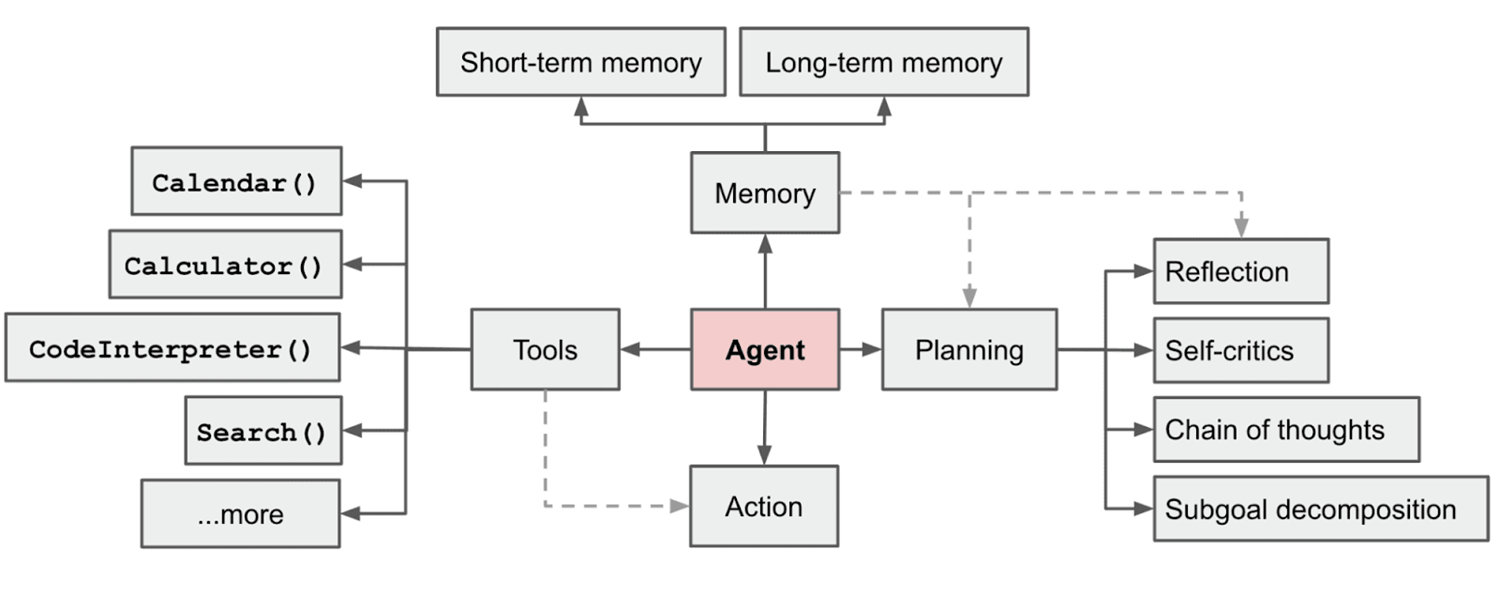

## Tools

In [29]:
from langchain_community.retrievers import TavilySearchAPIRetriever
from langchain.tools.retriever import create_retriever_tool

# Define web search tool
def get_tavily_search_retriever():
    retriever = TavilySearchAPIRetriever(k=7)
    retriever_description = "Use this tool when you need to answer questions related to current events and latest happenings or anything related to the user ask"
    retrieve_tool = create_retriever_tool(retriever=retriever, name="web_search", description=retriever_description)
    return retrieve_tool

# Creating a list of tools for LLM Math and Web Search
tavily_search_tool = get_tavily_search_retriever()



In [30]:
from langchain.chains import LLMMathChain
from langchain.tools import Tool

# Define the Math Tool
problem_chain = LLMMathChain.from_llm(llm=llm)
math_tool = Tool.from_function(
    name="Calculator",
    func=problem_chain.run,
    description="Useful for when you need to answer questions about math. This tool must be used for any type of math questions where numbers are involved"
)


In [31]:
tools = [tavily_search_tool, math_tool]

## Memory

In [43]:
# Initialize memory
from langchain.memory import ConversationBufferMemory
memory = ConversationBufferMemory(memory_key="chat_history")

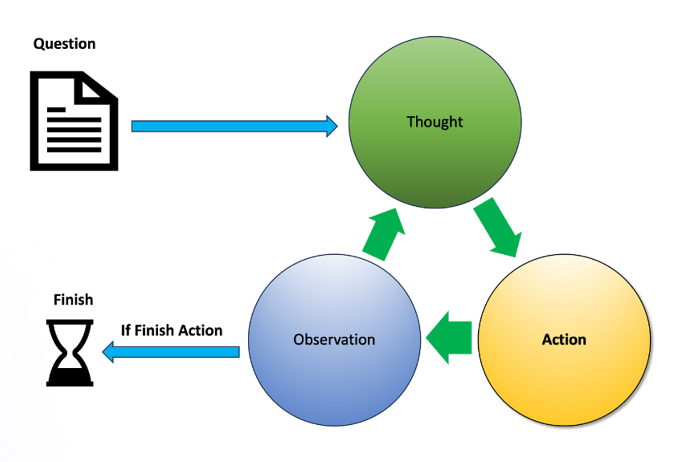

In [44]:
from langchain.agents import AgentType
from langchain.agents import initialize_agent

# Initialize the agent with verbose output
agent = initialize_agent(tools, llm, agent=AgentType.CONVERSATIONAL_REACT_DESCRIPTION, verbose=True, memory=memory)

Let's test the agent we have built...

##Fun time...

In [34]:
llm.invoke("How many 'r's are there in the word Strawberry").content

'The word "Strawberry" contains two \'r\'s.'

In [35]:
agent.run(input="How many 'r's are there in the word Strawberry")



> Entering new AgentExecutor chain...
Thought: Do I need to use a tool? No
AI: There are three 'r's in the word "Strawberry".

> Finished chain.


'There are three \'r\'s in the word "Strawberry".'

In [ ]:
# @title
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
      white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

In [45]:
agent.run(input="Which was coldest on Jul 28th 2024? Hyderabad or Delhi or New York ? I need the difference")



> Entering new AgentExecutor chain...
Thought: Do I need to use a tool? Yes
Action: web_search
Action Input: Coldest temperature on July 28th, 2024 in Hyderabad, Delhi, and New York.
Observation: Detailed ⚡ Weather Forecast for July 28 in Hyderabad, State of Andhra Pradesh, India - 🌡️ temperature, wind, atmospheric pressure, humidity and precipitations - World-Weather.info ... July 28, 2024 : Atmospheric conditions and temperature °F: RealFeel °F: ... Weather in New Delhi +88 ...

Hyderabad (India) weather in July 2024 ☀️ Accurate weather forecast for Hyderabad in July ⛅ Detailed forecast By month Current temperature "near me" Weather news ⊳ Widget of weather ⊳ Water temperature | METEOPROG ... 28 July +30 °+24° 29 July +29° ... New Delhi +32° ...

Detailed ⚡ Hyderabad Weather Forecast for July 2024 - day/night 🌡️ temperatures, precipitations - World-Weather.info ... 28 +84° +75° 29 +84° +75° 30 ... Weather in large and nearby cities. Weather in New Delhi +90 ...

Weather ☀ ⛅ Hyderab

'On July 28th, 2024, the coldest city among Hyderabad, Delhi, and New York was New York with a low temperature of 73°F (23°C). In comparison, Hyderabad had a low of 75°F (24°C), and Delhi had a low of 88°F (31°C).\n\nThe temperature difference between the coldest city (New York) and the warmest city (Delhi) on that day is 15°F (8°C).'

let's ask a follow up

In [46]:
agent.run(input="Which city in Switzerland has got lesser temperature than the winner and what is the cube root of the difference")



> Entering new AgentExecutor chain...
Thought: Do I need to use a tool? Yes
Action: web_search
Action Input: Check the temperature of cities in Switzerland on July 28th, 2024, and compare them to New York's temperature of 73°F (23°C) to find any city with a lower temperature. Also, find the cube root of the temperature difference between the two cities.
Observation: Are you planning a holiday with hopefully nice weather in Zurich in July 2024? Here you can find all information about the weather in Zurich in July: ... Min. Temperature °C (°F)-1.9 °C (28.6) °F-2.3 °C (27.9) °F. 0.7 °C (33.2) °F. 3.9 °C ... Delhi in July New York in July London in July Mumbai in July Uttar Pradesh in July Seattle in ...

Switzerland Weather in July ... Min. Temperature °C (°F)-2 °C (28.5) °F-1.7 °C (28.9) °F. 1 °C (33.9) °F. 4.7 °C (40.4) °F. 8.7 °C (47.6) °F. 12.7 °C ... Delhi in July New York in July London in July Mumbai in July Uttar Pradesh in July Seattle in July Dubai in July Paris in July Califo

"Zurich in Switzerland has a lower temperature than New York on July 28th, 2024. The minimum temperature in Zurich is about 63°F (17°C), compared to New York's 73°F (23°C). The difference in temperature between the two cities is 10°F. The cube root of this temperature difference is approximately 3.54."